# Implementing an Auto Encoder

In [27]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [129]:
def initialize_autoencoder_network(N, K):
    
    X = tf.placeholder('float',(None, N))
    
    W_init_max = 4 * np.sqrt(6. / (N + K))
    W_f = tf.Variable(tf.random_uniform(shape=(N, K), minval=-W_init_max, maxval=W_init_max))
    b_f = tf.Variable(tf.zeros([K]))
    
    hidden_layer = tf.nn.sigmoid(tf.matmul(X, W_f) + b_f)
    
    W_r = tf.transpose(W_f)
    b_r = tf.Variable(tf.zeros(N))
    
    reconstructed_layer = tf.nn.sigmoid(tf.matmul(hidden_layer, W_r) + b_r)
    cost = tf.reduce_sum(tf.pow((X-reconstructed_layer), 2))
    train_op = tf.train.AdamOptimizer(1e-3).minimize(cost)
    
    return [X, [W_f,b_f], hidden_layer, [W_r, b_r], reconstructed_layer, cost, train_op]

In [64]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X = mnist.train.images

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


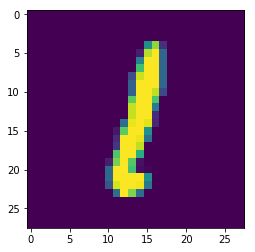

In [231]:
plt.imshow(np.reshape(X[6,:], (28, 28)))
plt.show()

In [232]:
model = initialize_autoencoder_network(784, 10)

In [233]:
def train(X, model, sess, epochs=100, batch_size=128):
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    sess.run(tf.global_variables_initializer())
    plt.ion()
    for i in range(epochs):
        print('Epoch: ', i)
        for start, end in zip(range(0, len(X), 128), range(128, len(X), 128)):
            X_batch = X[start:end]
            sess.run(model[-1], feed_dict={model[0]: X[start:end]})
        index = np.random.choice(range(X.shape[0]))
        ax1.cla();ax2.cla()
        ax1.imshow(np.reshape(X[index,:], (28, 28)))
        ax2.imshow(np.reshape(sess.run(model[-3], feed_dict={model[0]:np.reshape(X[index,:], [-1, 784])}), (28, 28)))

Epoch:  0


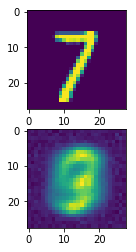

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9


In [255]:
sess.close()
sess = tf.Session()
train(X, model, sess, 10)

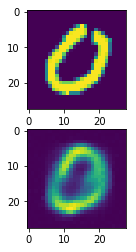

In [256]:
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
reconstruction = sess.run(model[-3], feed_dict={model[0]:np.reshape(X[7,:], [-1, 784])})
ax1.imshow(np.reshape(X[7,:], (28, 28)))
ax2.imshow(np.reshape(reconstruction, (28, 28)))
plt.show()

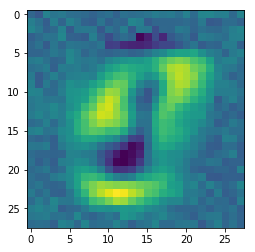

In [257]:
vec = np.zeros([1,10], dtype=np.float32)
vec[0][3] = 1
tweak = (tf.matmul(tf.constant(vec), model[3][0])).eval(session=sess)
plt.imshow(np.reshape(tweak, (28, 28)))